# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

# Ignoring all warnings throughout the notebook
import warnings
warnings.filterwarnings('ignore')

Load feature names.

In [2]:
feature_names = []
with open('mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print ('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].


The fraction of the total variance explained in the training data in 
the first 50 principal components is 0.98


k-Components 		 Examplained Variance Ratio 		 Cum. Explained Variance
    1 		 | 		 0.1640 		 | 		 0.1640
    2 		 | 		 0.1332 		 | 		 0.2973
    3 		 | 		 0.1017 		 | 		 0.3990
    4 		 | 		 0.0706 		 | 		 0.4696
    5 		 | 		 0.0387 		 | 		 0.5083
    6 		 | 		 0.0368 		 | 		 0.5451
    7 		 | 		 0.0313 		 | 		 0.5764
    8 		 | 		 0.0273 		 | 		 0.6037
    9 		 | 		 0.0262 		 | 		 0.6299
    10 		 | 		 0.0223 		 | 		 0.6522
    11 		 | 		 0.0205 		 | 		 0.6727
    12 		 | 		 0.0187 		 | 		 0.6914
    13 		 | 		 0.0173 		 | 		 0.7087
    14 		 | 		 0.0168 		 | 		 0.7256
    15 		 | 		 0.0152 		 | 		 0.7408
    16 		 | 		 0.0151 		 | 		 0.7558
    17 		 | 		 0.0143 		 | 		 0.7701
    18 		 | 		 0.0141 		 | 		 0.7843
    19 		 | 		 0.0133 		 | 		 0.7975
    20 		 | 		 0.0115 		 | 		 0.8090
    21 		 | 		 0.0107 		 | 		 0.8197
    22 		 | 		 0.0107 		 | 		 0.8303
    23 		 

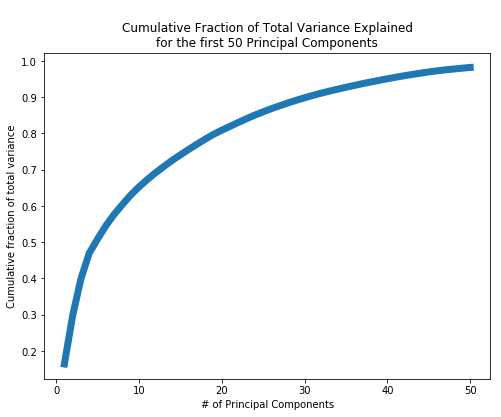

In [4]:
def P1():
### STUDENT START ###
    
    # PCA with 50 components and fitting the training data
    k_comp = 50
    pca_mod_1 = PCA(n_components = k_comp)
    pca_mod_1.fit(train_data)

    print("\nThe fraction of the total variance explained in the training data in \nthe first", 
          k_comp, "principal components is" + "\033[1m", 
          "%.2f" % np.cumsum(pca_mod_1.explained_variance_ratio_)[-1])
    
    # Printing results of the table
    print("\n\nk-Components \t\t Examplained Variance Ratio \t\t Cum. Explained Variance" + "\033[0m")
    for i in range(50):
        print("   ",list(range(1, k_comp+1))[i], "\t\t | \t\t",
              "%.4f" % list(pca_mod_1.explained_variance_ratio_)[i], "\t\t | \t\t",
              "%.4f" % list(np.cumsum(pca_mod_1.explained_variance_ratio_))[i])
    
    # Plotting the cumulative explained variance ratio
    plt.figure(figsize = (8,6))
    plt.title('\nCumulative Fraction of Total Variance Explained' 
             '\nfor the first {} Principal Components'.format(k_comp))
    plt.plot([i for i in range(1, k_comp+1)], np.cumsum(pca_mod_1.explained_variance_ratio_), linewidth=7.0)
    plt.xlabel('# of Principal Components')
    plt.ylabel('Cumulative fraction of total variance')
    plt.show()

### STUDENT END ###

P1()

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

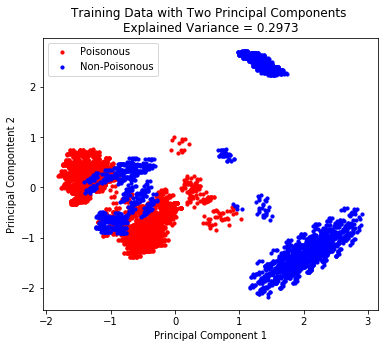

In [5]:
def P2():
### STUDENT START ###

    # PCA with two components; fitting and transforming to the training data
    pca_mod_2 = PCA(n_components = 2)
    projected_train = pca_mod_2.fit_transform(train_data)

    # Setting up the graph
    plt.figure(figsize=(6,5))
    plt.xlabel ("Principal Component 1")
    plt.ylabel ("Principal Compontent 2")
    plt.title ("Training Data with Two Principal Components \nExplained Variance = {}".format("%.4f" % 
                                                                         float(pca_mod_2.explained_variance_ratio_[0] + 
                                                                               pca_mod_2.explained_variance_ratio_[1])))

    # Creating a scatter plot for the poisonous and then non-poisonous 
    # mushrooms based on the training labels
    plt.scatter(projected_train[train_labels == 0,0], 
                projected_train[train_labels == 0,1], color="red", s = 10)
    plt.scatter(projected_train[train_labels == 1,0], 
                projected_train[train_labels == 1,1], color="blue", s = 10)
    
    # Creating the poisonous vs. non-poisonous legend
    types = ("Poisonous", "Non-Poisonous")
    plt.legend (types)
    plt.show()
    
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

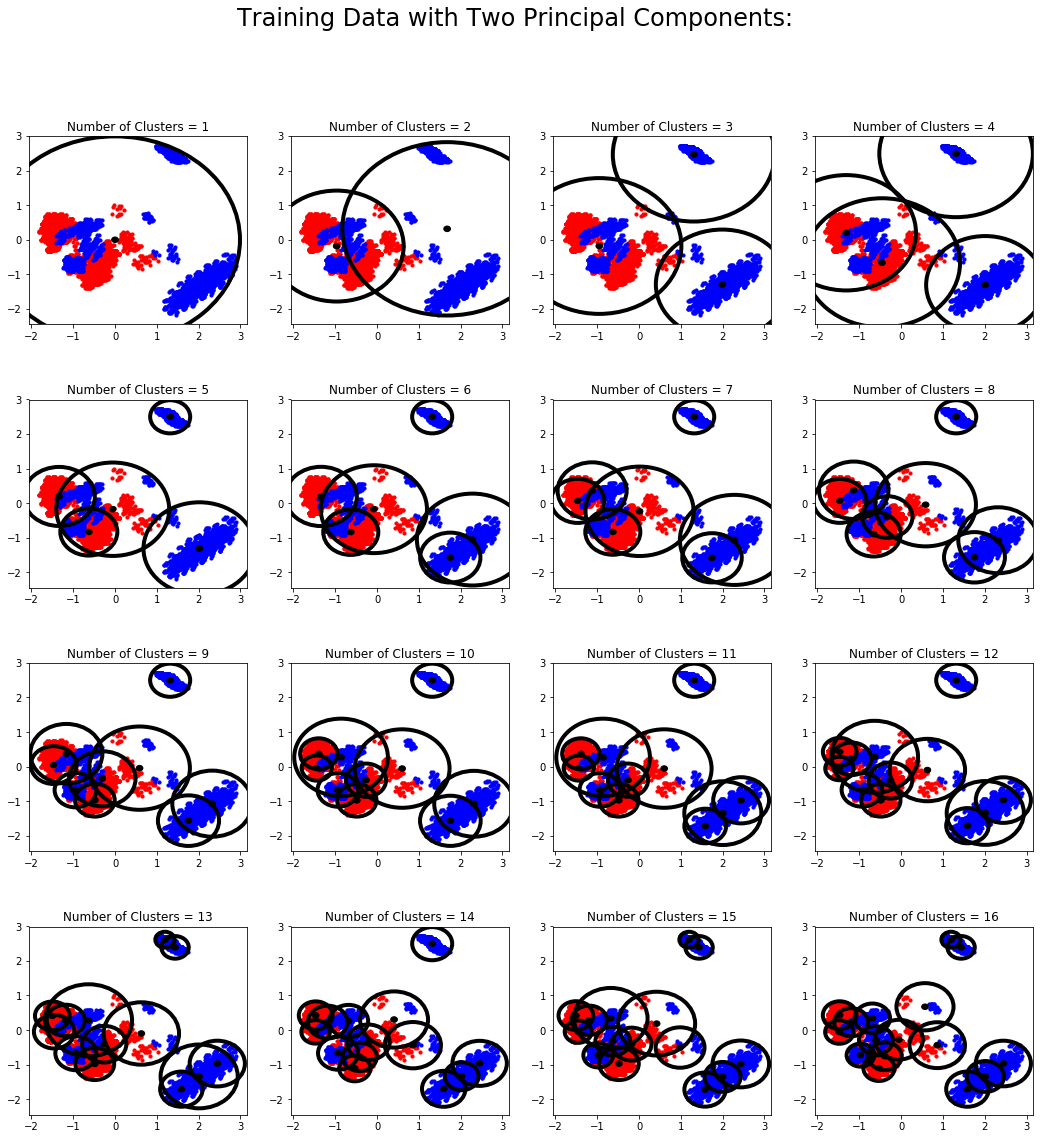

In [6]:
def P3():
### STUDENT START ###

    # PCA with two components; fitting and transforming to the training data
    pca_mod_3 = PCA(n_components = 2)
    projected_train = pca_mod_3.fit_transform(train_data)
    
    # Initializing the subplot figure size and space in between
    plt.figure (figsize = (18, 18))
    plt.suptitle("Training Data with Two Principal Components:", fontsize=24)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    
    # Number of clusters 
    for n_clust in range(1,17):
        
        # Initializing and fitting the clusters
        km = KMeans (n_clusters=n_clust)
        km_fit = km.fit(projected_train)
        
        # Defining and storing the centers of the clusters
        centroid = []
        for i in range(n_clust):
            centroid.append((km.cluster_centers_[i,0], km.cluster_centers_[i,1]))
        
        # Transforming all points to be the distance from the cluster centers
        # In the array, each row is the distance of one data point 
        # from the respective cluster center in each column
        dist_to_center = km.transform(projected_train)
        
        # Setting the proper number of subplots within our greater figure
        graph = plt.subplot(4,4,n_clust)
        
        # Creating the scatter plots for the poisonous and then non-poisonous mushrooms
        # Setting coordinates for the two scatter plots and then initiating a title 
        graph.scatter(projected_train[train_labels == 0,0], 
                      projected_train[train_labels == 0,1], color="red", s = 10)
        graph.scatter(projected_train[train_labels == 1,0], 
                      projected_train[train_labels == 1,1], color="blue", s = 10)
        plt.title ("Number of Clusters = {}".format(str(n_clust)))
        
        # Plotting the circles on top of each scatterplot
        for clust in range(n_clust):
            
            # Plotting the center of each circle at the centroid
            dot = plt.Circle(centroid[clust],0.08, color = 'black')
            
            # Plotting each circle around the centroid at the max dist_to_center
            circle = plt.Circle(centroid[clust], 
                                np.max(dist_to_center[km_fit.labels_ == clust, clust]), 
                                fill=False, linewidth = 4)
            
            # Printing the circles
            # Decided not to show a legend here for space purposes
            graph.add_artist(circle)
            graph.add_artist(dot)
            

### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

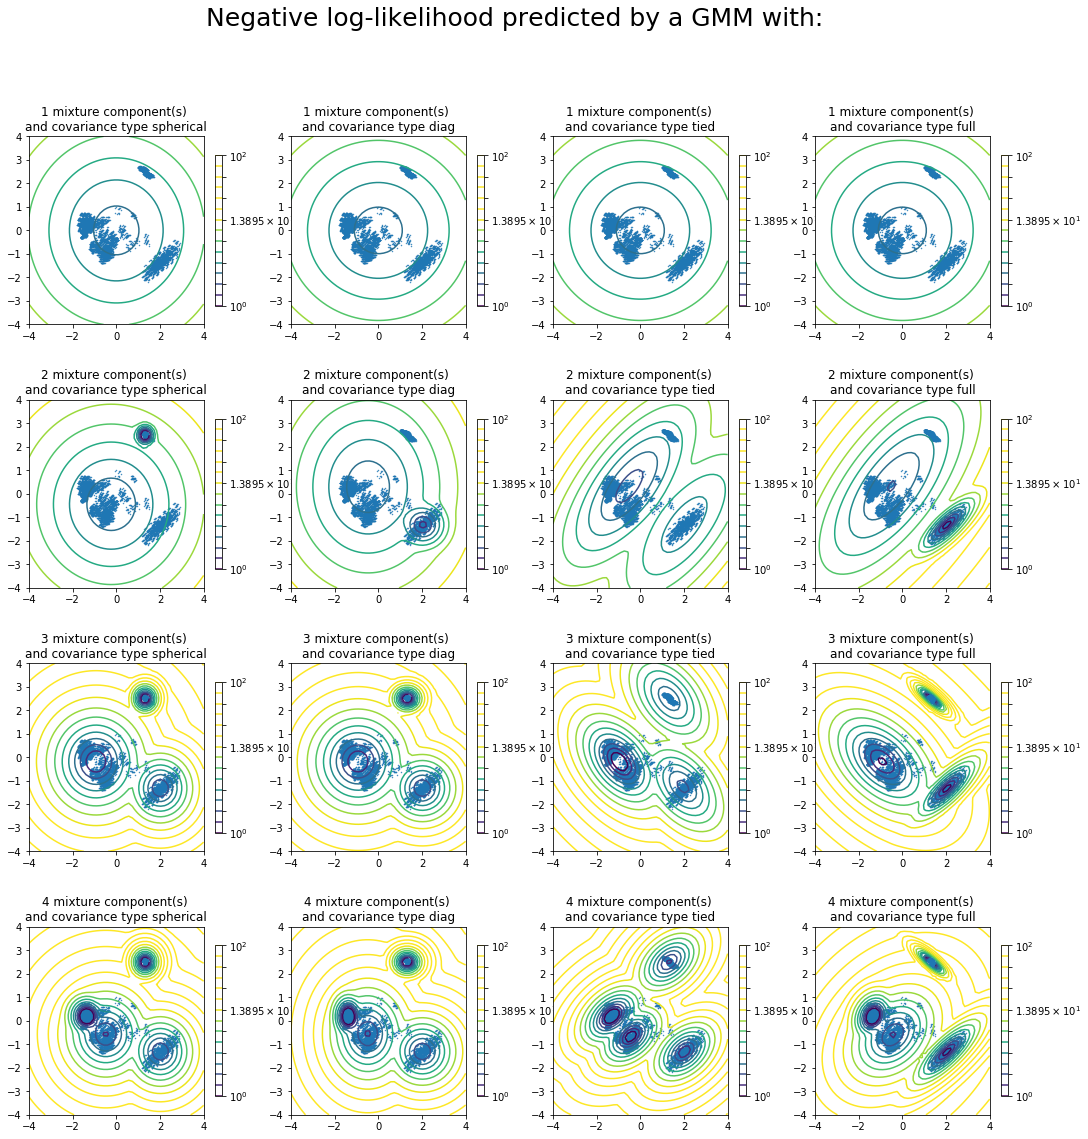

In [7]:
def P4():
### STUDENT START ###

    # Setting a random seed as sometimes the graphs changed each time
    np.random.seed(0)
    
    # PCA with two components; fitting and transforming to the training data
    pca_mod_4 = PCA(n_components = 2)
    projected_train = pca_mod_4.fit_transform(train_data)
    
    # Initializing the subplot figure size and space in between
    plt.figure (figsize = (18,18))
    plt.suptitle("Negative log-likelihood predicted by a GMM with:", fontsize=25)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    
    # Getting the positive data where labels = 1
    projected_train_pos = projected_train[train_labels == 1, :]
    
    # Four compontents and four mixture compontent types
    covariance_type = ['spherical', 'diag', 'tied', 'full']
    n_components = range(1,5)
    
    # Building the model and putting each separate iteration into a list
    models = []
    for cov in range(4):
        for n in range(4):
            
            # Selecting the covariance type by the index of n
            GMM_model = GaussianMixture(n_components=n_components[n], covariance_type=covariance_type[cov])
            GMM_model.fit(projected_train)
            
            # Creating an index to iterate through the subplot
            index = 4*n + cov + 1
            ax = plt.subplot(4,4, index)
            
            # Building each plot within the for loop
            # Most of this text is provided from the website above
            x = np.linspace(-4, 4)
            y = np.linspace(-4, 4)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -GMM_model.score_samples(XX)
            Z = Z.reshape(X.shape)

            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=15.0),
                 levels=np.logspace(0, 2, 15))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            
            # All colors here are blue (positive, so we do not need
            # to worry about the positive vs. negative colors
            ax.scatter(projected_train[:, 0], projected_train[:, 1], 0.8, marker = '.')

            plt.title('{} mixture component(s) \nand covariance type {}'.format(n_components[n],covariance_type[cov]))
            plt.axis('tight')
            
### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [8]:
def P5():
### STUDENT START ###
    
    # PCA with two components; fitting and transforming to the training data
    pca_mod_6 = PCA(n_components = 2)
    projected_train = pca_mod_6.fit_transform(train_data)
    projected_test = pca_mod_6.transform(test_data)
    
    # Getting the positive and negative training data
    # where the train labels equal 1 or 0 respectively
    projected_train_pos = projected_train[train_labels == 1, :]
    projected_train_neg = projected_train[train_labels == 0, :]
    
    # Four compontent GMM for positive and then negative data
    GMM_pos = GaussianMixture(n_components = 4)
    GMM_pos.fit(projected_train_pos)
    GMM_score_pos = GMM_pos.score_samples(projected_test)
                    
    GMM_neg = GaussianMixture(n_components = 4)
    GMM_neg.fit(projected_train_neg)
    GMM_score_neg = GMM_neg.score_samples(projected_test)
    
    # Initializing the number of correct label predictions
    correct = 0
                    
    # Evaluating positive vs. negative predictions at i
    for i in range(len(test_data)):
                        
        # Value of 1 if the GMM_score_pos is greater than GMM_score_neg in test data
        # This compares the two GMM model probabilities
        if GMM_score_pos[i] > GMM_score_neg[i]:
            val = 1
        
        else:
            val = 0
        
        if val == test_labels[i]:
             correct += 1 
                    
    print("Accuracy for predicting label when label has larger model probability:", 
          "%.4f" % (correct / len(test_data)))

### STUDENT END ###

P5()

Accuracy for predicting label when label has larger model probability: 0.9368


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [9]:
def P6():
### STUDENT START ###
    
    # Establish parameters based on question
    num_of_classes = 2
    covariance_type = ['spherical', 'diag', 'tied', 'full']
    pca_components = range(1,51)
    gmm_components = range(1,51)
    parameters_list = []
    accuracy_given_parameters = []
    
    # Looping through all of the pca_components
    for pca in pca_components:
        
        # Looping through all of the covariance types
        for cov in covariance_type: 
            
            # Looping through all of the gmm_components
            for gmm in gmm_components:
                
                # Covariance type spherical and diag can take any number of PCA components
                # In covariance type full, we have to square the PCA components
                # In covariance type tied, we have (PCA compontents^2 / GMM Components)
                if cov == 'spherical' or cov == 'diag':
                    cov_components = pca
                    
                elif cov == 'full':
                    cov_components = pca**2
                
                else:
                    cov_components = pca**2 / gmm
                
                total_parameters = ((pca + cov_components) * gmm) * num_of_classes
                
                # Question states not to evaluate more than 50 parameters
                if total_parameters < 50:
                    
                    # Appending as a tuple; keeping track of the num_of_parameters
                    # num of pca components, num of gmm compontents and covariance type
                    parameters_list.append((pca, cov, gmm, total_parameters))
                    
                    # Running PCA; fitting and transforming to the training data
                    # and transforming to the testing data
                    pca_mod_6 = PCA(n_components = pca)
                    projected_train = pca_mod_6.fit_transform(train_data)
                    projected_test = pca_mod_6.transform(test_data)
                    
                    # Getting the positive and negative training data
                    # where the train labels equal 1 or 0 respectively
                    projected_train_pos = projected_train[train_labels == 1, :]
                    projected_train_neg = projected_train[train_labels == 0, :]
                    
                    # Four compontent GMM for positive and then negative data
                    GMM_pos = GaussianMixture(n_components = gmm, covariance_type = cov)
                    GMM_pos.fit(projected_train_pos)
                    GMM_score_pos = GMM_pos.score_samples(projected_test)
                    
                    GMM_neg = GaussianMixture(n_components = gmm, covariance_type = cov)
                    GMM_neg.fit(projected_train_neg)
                    GMM_score_neg = GMM_neg.score_samples(projected_test)
                    
                    # Initializing the number of correct label predictions
                    correct = 0
                    
                    # Evaluating positive vs. negative predictions at i
                    for i in range(len(test_data)):
                        
                        # Value of 1 if the GMM_score_pos is greater than GMM_score_neg in test data
                        # This compares the two GMM model probabilities
                        if GMM_score_pos[i] > GMM_score_neg[i]:
                            val = 1
        
                        else:
                            val = 0
        
                        if val == test_labels[i]:
                            correct += 1 
                    
                    accuracy_given_parameters.append([correct / len(test_data)])
    
    # Getting the index for the highest accuracy given a number of parameters
    highest_accuracy = accuracy_given_parameters.index(np.max(accuracy_given_parameters))
    
    # Printing the parameter specifications at the highest accuracy
    print("Num of PCA components:", parameters_list[highest_accuracy][0],
          "\nCovariance type:", parameters_list[highest_accuracy][1],
          "\nNum of GMM components:", parameters_list[highest_accuracy][2],
          "\nNum of parameters:", parameters_list[highest_accuracy][3],
          "\nAccuracy:", "%.4f" % np.max(accuracy_given_parameters))
                    
                        
### STUDENT END ###

P6()

Num of PCA components: 3 
Covariance type: spherical 
Num of GMM components: 4 
Num of parameters: 48 
Accuracy: 0.9591
